This is for research question 5.

Do cultural differences influence the type of movie ending? 

Are there notable differences in the types of endings preferred or produced in different countries, suggesting cultural factors at play?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# path
DATA_FOLDER = '../../Data/MovieSummaries/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_cleaned.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')


In [15]:
movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0


In [16]:
movies = movies.dropna(subset=['Movie countries'])
movies = movies.dropna(subset=['Score'])

In [17]:

# since a movie can have multiple countries, we need to split the string and count the number of countries
movies['Movie countries'] = movies['Movie countries'].apply(lambda x: x.split(',') if ',' in x else [x])


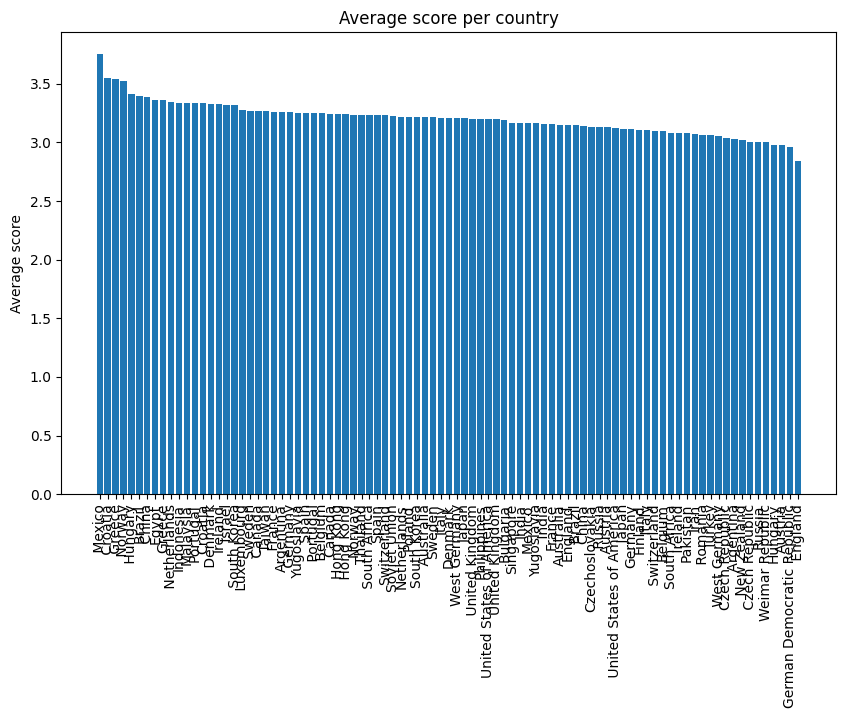

In [20]:
# calculate the average score for each country
countries = {}
for index, row in movies.iterrows():
    for country in row['Movie countries']:
        if country not in countries:
            countries[country] = []
        countries[country].append(row['Score'])

# calculate the average rating for each country
countries_avg = {}
for country, scores in countries.items():
    countries_avg[country] = np.mean(scores)

# convert the dictionary to a dataframe
countries_df = pd.DataFrame(list(countries_avg.items()), columns=['Country', 'Average score'])

# filter the countries with more than 10 movies
countries_df = countries_df[countries_df['Country'].apply(lambda x: len(countries[x]) > 10)]

# sort the dataframe by the average score
countries_df = countries_df.sort_values(by='Average score', ascending=False)

# plot 
plt.figure(figsize=(10, 6))
plt.bar(countries_df['Country'], countries_df['Average score'])
plt.xticks(rotation=90)
plt.ylabel('Average score')
plt.title('Average score per country')
plt.show()


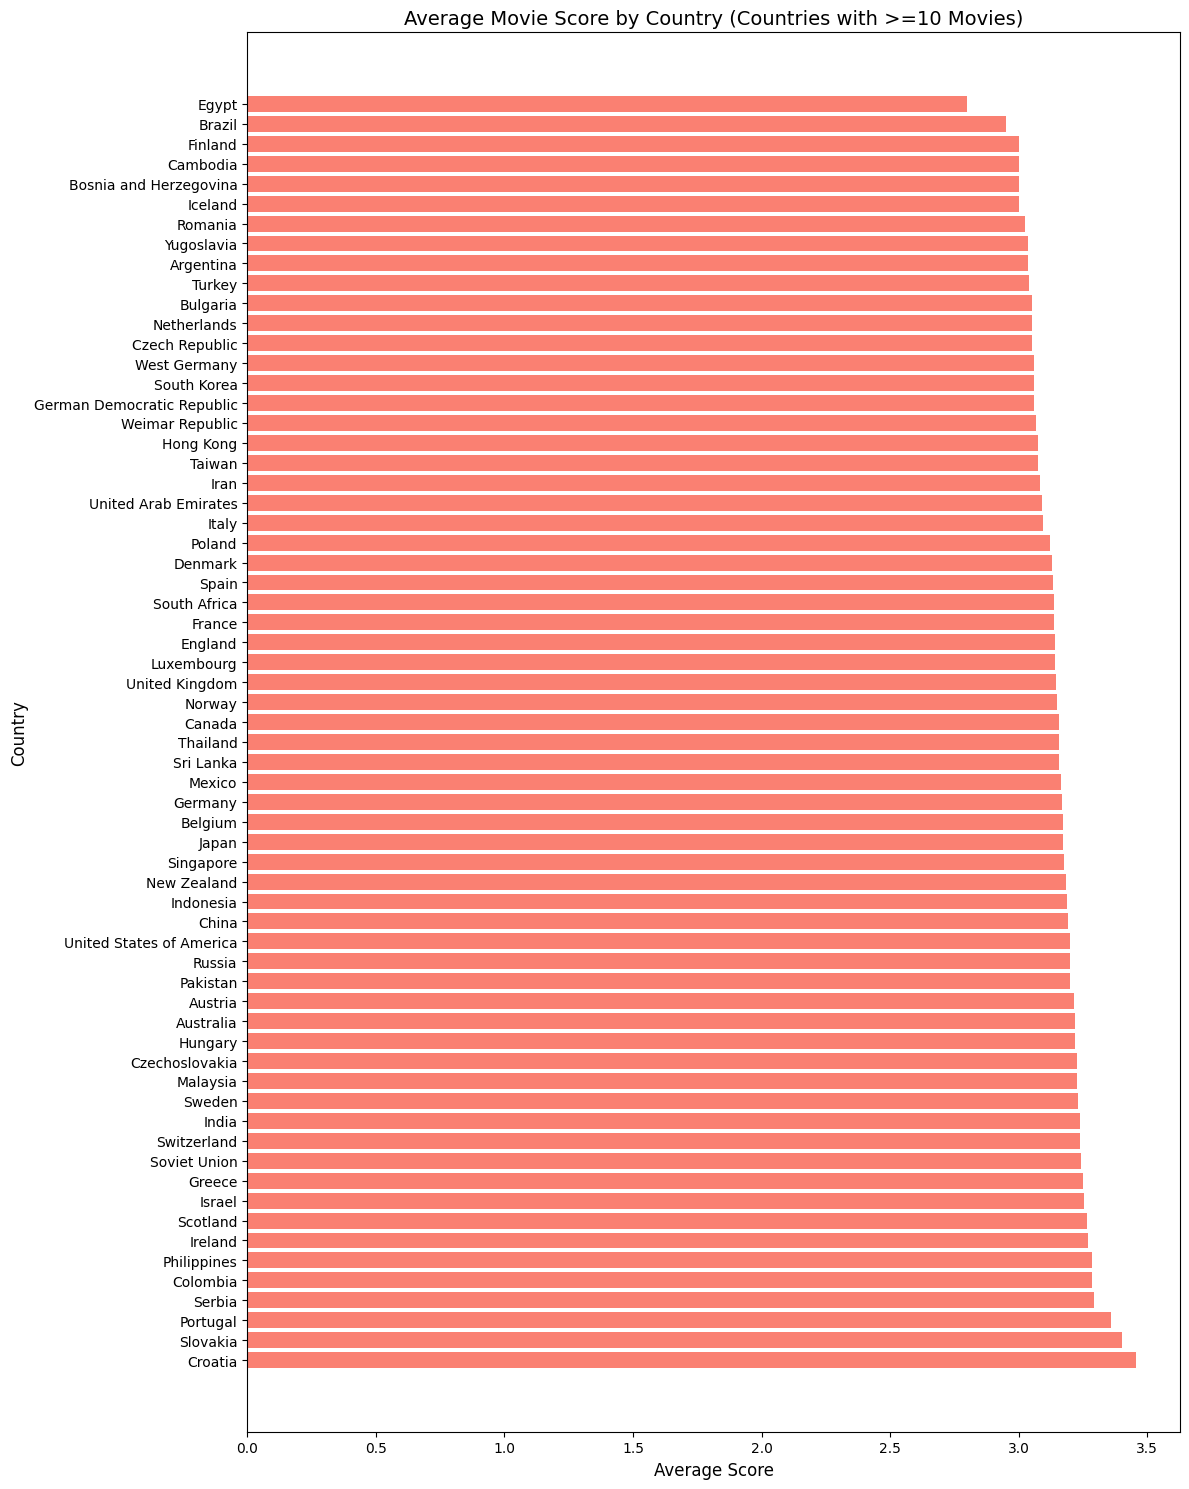

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
movies_df = pd.read_csv('../data/movies_dataset_final.tsv', sep='\t')

# Ensure each country has its own row
movies_df = movies_df.assign(Country=movies_df['Country'].str.split(", ")).explode('Country')

# Calculate the average score and film count per country
country_stats = movies_df.groupby('Country').agg(
    Average_Score=('Score', 'mean'),  # Average score of movies
    Film_Count=('Score', 'size')     # Number of movies
).sort_values(by='Average_Score', ascending=False)

# Filter countries with at least 10 movies
country_stats_10_plus = country_stats[country_stats['Film_Count'] >= 10]

# Plot the graph
plt.figure(figsize=(12, 15))
plt.barh(country_stats_10_plus.index, country_stats_10_plus['Average_Score'], color='salmon')
plt.ylabel('Country', fontsize=12)  # Y-axis label
plt.xlabel('Average Score', fontsize=12)  # X-axis label
plt.xticks(fontsize=10)  # Font size for X-axis ticks
plt.yticks(fontsize=10)  # Font size for Y-axis ticks
plt.title('Average Movie Score by Country (Countries with >=10 Movies)', fontsize=14)
plt.tight_layout()
plt.show()
